# Tutorial: 3 types of distribution

**1. Population Distribution**<br>
**2. Sample Distribution**<br>
**3. Sampling distribution of the sample mean (or distribution of sample means)**<br>

Interesting material: <br> 
https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Introductory_Statistics_(Shafer_and_Zhang)/06%3A_Sampling_Distributions <br>
https://onlinestatbook.com/2/sampling_distributions/samplingdist_diff_means.html

### Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, gaussian_kde
from itertools import product, combinations
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

## 1. Population Distribution 

PMF or PDF:

This is the distribution of every possible outcome.

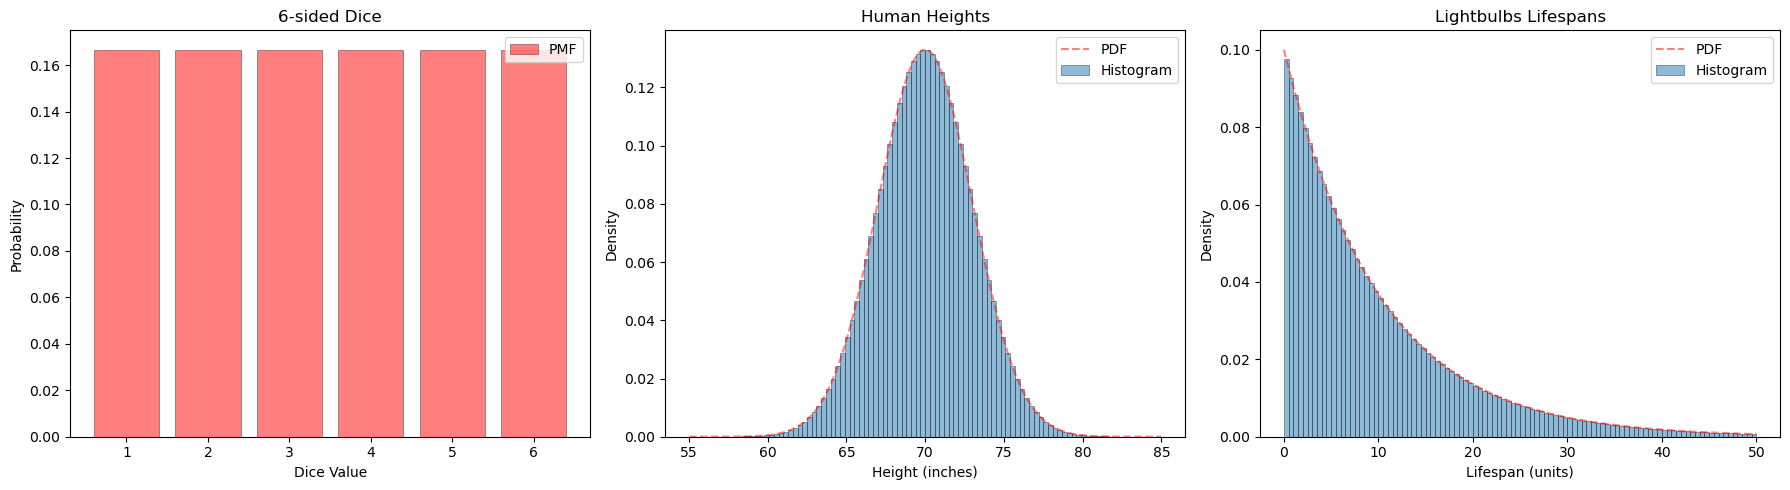

In [2]:
# Dice PMF
def f_dice(num_sides_dice):
    pmf_values = 1/num_sides_dice
    return pmf_values

# Human height
def f_height(x):
    mu = 70  # mean
    sigma = 3  # standard deviation
    pdf_values = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
    return pdf_values

# Lightbulb lifespan
def f_lightbulb(x):
    lambda_ = 1/10
    pdf_values = lambda_ * np.exp(-lambda_ * x)
    return pdf_values

# Histograms for humans height and lightbulb lifespan
def get_histogram_values(x_vals, y_vals, start, end, num_bins):
    bin_width = (end - start) / num_bins
    bins = np.linspace(start, end, num_bins + 1)
    mid_x_values = bins[:-1] + bin_width / 2
    pdf_values = [y_vals[np.argmin(np.abs(x_vals - x))] for x in mid_x_values]
    return mid_x_values, pdf_values

def plot_dice_pmf(axes, x_values, pmf, num_sides):
    axes.bar(x_values, pmf, color='red', alpha=0.5, edgecolor='black', linewidth=0.5, label='PMF')
    axes.set_title(f'{num_sides}-sided Dice')
    axes.set_xlabel('Dice Value')
    axes.set_ylabel('Probability')
    axes.set_xticks(x_values)
    axes.legend()

def plot_distribution(axes, x_values, pdf_curve, mid_x_values, pdf_values, bin_width, title, xlabel, ylabel):
    axes.plot(x_values, pdf_curve, label='PDF', color='red', linestyle='dashed', alpha=0.5, linewidth=1.5)
    axes.bar(mid_x_values, pdf_values, width=bin_width, alpha=0.5, edgecolor='black', linewidth=0.5, label='Histogram')
    axes.set_title(title)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.legend()
    
    
### MAIN ###

# Here we define the number of distinct elements our sample can have
num_sides_dice = 6  
num_bins_humans = 100
num_bins_lightbulbs = 100

# To get the values for the PMF or PDF (red bars and red lines)
x_values_dice = np.arange(1, num_sides_dice+1)
pmf_dice = [f_dice(num_sides_dice) for x in x_values_dice]

x_values_height = np.linspace(55, 85, 1000)
pdf_curve_height = [f_height(x) for x in x_values_height]

x_values_lightbulb = np.linspace(0, 50, 1000)
pdf_curve_lightbulb = [f_lightbulb(x) for x in x_values_lightbulb]

# To get the values for the histograms (blue bars)
mid_x_values_height, pdf_values_height = get_histogram_values(x_values_height, pdf_curve_height, 55, 85, num_bins_humans)
mid_x_values_lightbulb, pdf_values_lightbulb = get_histogram_values(x_values_lightbulb, pdf_curve_lightbulb, 0, 50, num_bins_lightbulbs)
    
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
plot_dice_pmf(axes[0], x_values_dice, pmf_dice, num_sides_dice)
plot_distribution(axes[1], x_values_height, pdf_curve_height, mid_x_values_height, pdf_values_height, (85 - 55) / len(mid_x_values_height), 'Human Heights', 'Height (inches)', 'Density')
plot_distribution(axes[2], x_values_lightbulb, pdf_curve_lightbulb, mid_x_values_lightbulb, pdf_values_lightbulb, 50 / len(mid_x_values_lightbulb), 'Lightbulbs Lifespans', 'Lifespan (units)', 'Density')

plt.tight_layout()
plt.show()

### [Optional] Discretized populations 
Discretization of the PDF or PMF, just to faciliate further calculations


Dice
Number of bins: 2
Counts: 100


,X,counts
0,1,50
1,2,50



Human heights
Number of bins: 3
Counts: 100


,X,counts
0,60.0,5
1,70.0,90
2,80.0,5



Lightbulb lifespan
Number of bins: 4
Counts: 101


,X,counts
0,6.25,72
1,18.75,21
2,31.25,6
3,43.75,2


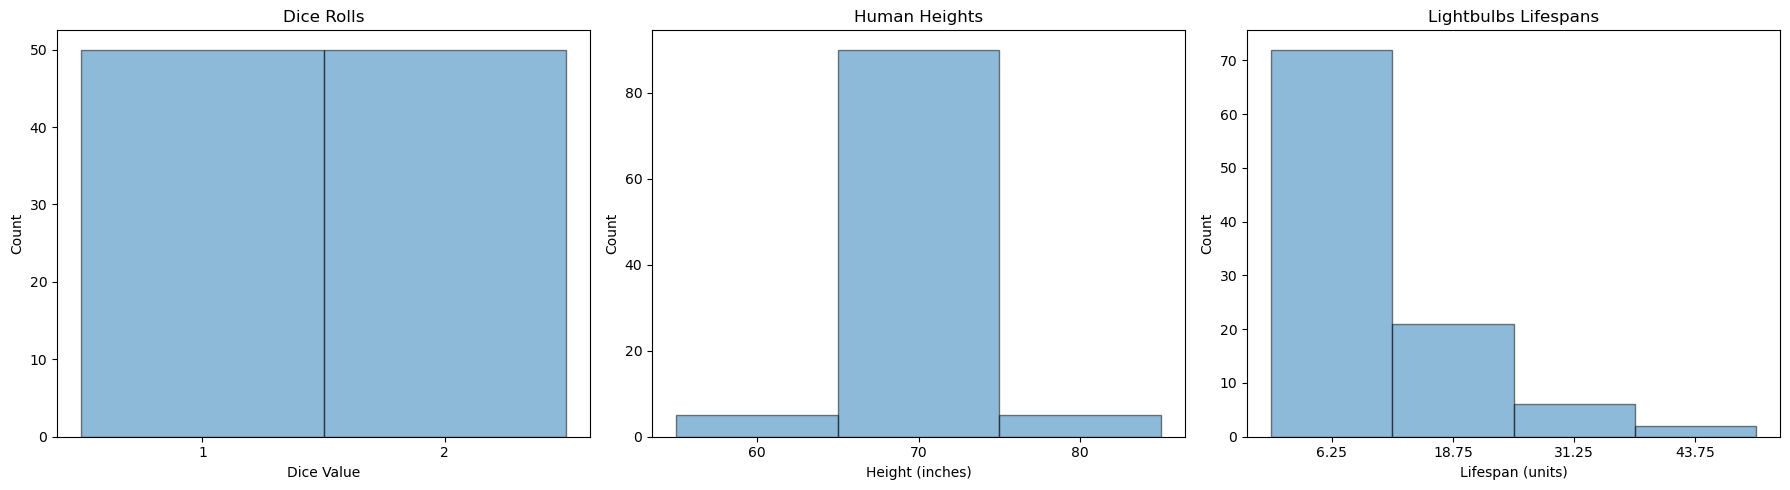

In [3]:
def discretize_curve(f, start, end, n_bins, total_count):
    bin_edges = np.linspace(start, end, n_bins + 1)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.0
    bin_width = (end - start) / n_bins
    densities = np.array([np.mean(f(np.linspace(edge, bin_edges[i+1], 100))) for i, edge in enumerate(bin_edges[:-1])])
    float_counts = densities * total_count / sum(densities)
    int_counts = np.round(float_counts).astype(int)

    # Remove elements where int_counts is 0
    non_zero_indices = int_counts != 0
    bin_centers = bin_centers[non_zero_indices]
    int_counts = int_counts[non_zero_indices]

    return bin_centers, int_counts

def discretize_dice(num_sides_dice, total_count):
    pmf_value = f_dice(num_sides_dice)
    counts = [int(pmf_value * total_count) for _ in range(num_sides_dice)]
    
    # Distribute any remaining counts
    remainder = total_count - sum(counts)
    for i in range(remainder):
        counts[i % num_sides_dice] += 1
    
    # Remove elements where counts is 0
    non_zero_indices = np.array(counts) != 0
    centers = np.arange(1, num_sides_dice + 1)[non_zero_indices]
    counts = np.array(counts)[non_zero_indices].tolist()

    return centers, counts

def plot_discretized_distribution(ax, centers, counts, bin_width, title, xlabel, ylabel, is_dice=False):
    ax.bar(centers, counts, width=bin_width, alpha=0.5, edgecolor='k')
    ax.set_xticks(centers)
    if len(centers) > 12:
        ax.tick_params(axis='x', rotation=90)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    

### MAIN ###

# Similar to before, here we define the number of distinct elements our sample can have in the discretized population. The discretized pop. should follow the pop. curve as close as possible.
# First we calculate the max amount of uniformly distributed bins our subpopulation can have.
num_bins_dice = 2
num_bins_height = 3
num_bins_lightbulb = 4

# Then we define the size of our subpopulation
total_count_dice = 100
total_count_height = 100
total_count_lightbulb = 100

# Discretize dice
centers_dice, counts_dice = discretize_dice(num_bins_dice, total_count_dice)
print(f"\nDice\nNumber of bins: {len(counts_dice)}\nCounts: {sum(counts_dice)}")
df_dice = pd.DataFrame({'X': centers_dice, 'counts': counts_dice})
display(df_dice)

# Discretize height
centers_height, counts_height = discretize_curve(f_height, 55, 85, num_bins_height, total_count_height)
print(f"\nHuman heights\nNumber of bins: {len(counts_height)}\nCounts: {sum(counts_height)}")
df_height = pd.DataFrame({'X': centers_height, 'counts': counts_height})
display(df_height)

# Discretize lightbulb
centers_lightbulb, counts_lightbulb = discretize_curve(f_lightbulb, 0, 50, num_bins_lightbulb, total_count_lightbulb)
print(f"\nLightbulb lifespan\nNumber of bins: {len(counts_lightbulb)}\nCounts: {sum(counts_lightbulb)}")
df_lightbulb = pd.DataFrame({'X': centers_lightbulb, 'counts': counts_lightbulb})
display(df_lightbulb)
    
# Plot
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
plot_discretized_distribution(axes[0], centers_dice, counts_dice, 1, "Dice Rolls", "Dice Value", "Count", is_dice=True)
plot_discretized_distribution(axes[1], centers_height, counts_height, (85-55)/num_bins_height, "Human Heights", "Height (inches)", "Count")
plot_discretized_distribution(axes[2], centers_lightbulb, counts_lightbulb, 50/num_bins_lightbulb, "Lightbulbs Lifespans", "Lifespan (units)", "Count")


plt.tight_layout()
plt.show()


## 2. Distribution of one sample

#### Draw samples of n scores from each of the discretized subpopulations above

Dice Samples - Distribution of 2 random rolls repeated 1 times:


,Score 1,Score 2
Sample 1,2,2



Heights Samples - Distribution of 5 human heights sampled 1 times:


,Score 1,Score 2,Score 3,Score 4,Score 5
Sample 1,80.0,80.0,80.0,70.0,70.0



Lightbulb Samples - Distribution of 10 lightbulb lifespans sampled 1 times:


,Score 1,Score 2,Score 3,Score 4,Score 5,Score 6,Score 7,Score 8,Score 9,Score 10
Sample 1,18.75,31.25,31.25,43.75,43.75,18.75,43.75,6.25,18.75,6.25


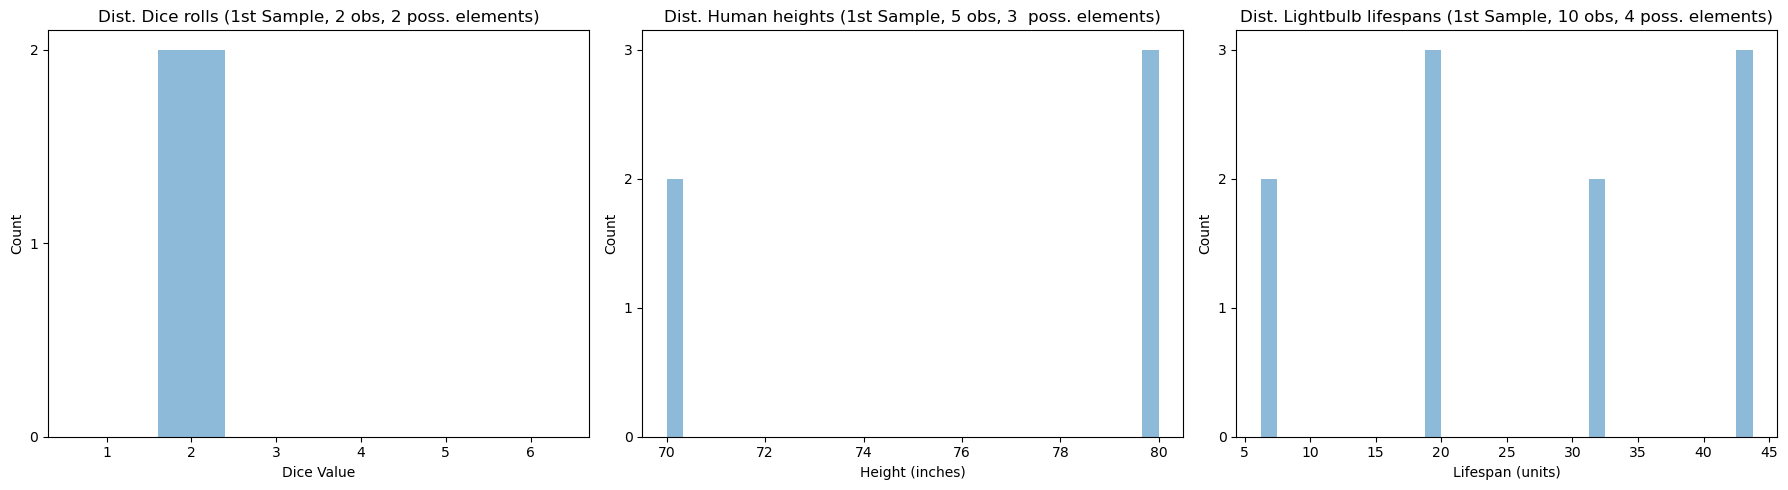

In [4]:
def sample_n_scores(df, num_scores, num_samples):
    """Sample num_scores scores from df num_samples times."""
    samples = [df.sample(num_scores, replace=True)['X'].tolist() for _ in range(num_samples)]
    columns = [f"Score {i+1}" for i in range(num_scores)]
    index = [f"Sample {i+1}" if i == 0 else str(i+1) for i in range(num_samples)]
    df_samples = pd.DataFrame(samples, columns=columns, index=index)
    return df_samples


### MAIN ###
num_samples_dice = 1
num_scores_dice = 2

num_samples_heights = 1
num_scores_heights = 5

num_samples_lightbulb = 1
num_scores_lightbulb = 10

# Sample dataframes
dice_samples_df = sample_n_scores(df_dice, num_scores_dice, num_samples_dice)
heights_samples_df = sample_n_scores(df_height, num_scores_heights, num_samples_heights)
lightbulb_samples_df = sample_n_scores(df_lightbulb, num_scores_lightbulb, num_samples_lightbulb)

# Displaying the sampled dataframes
title = f"Dice Samples - Distribution of {num_scores_dice} random rolls repeated {num_samples_dice} times:"
print(title)
display(dice_samples_df)

title = f"\nHeights Samples - Distribution of {num_scores_heights} human heights sampled {num_samples_heights} times:"
print(title)
display(heights_samples_df)

title = f"\nLightbulb Samples - Distribution of {num_scores_lightbulb} lightbulb lifespans sampled {num_samples_lightbulb} times:"
print(title)
display(lightbulb_samples_df)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Dice - Taking the first sample for plotting
axes[0].hist(dice_samples_df.iloc[0], bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], rwidth=0.8, alpha=0.5)
axes[0].set_title(f'Dist. Dice rolls (1st Sample, {num_scores_dice} obs, {num_bins_dice} poss. elements)')
axes[0].set_xlabel('Dice Value')
axes[0].set_ylabel('Count')
axes[0].set_xticks([1,2,3,4,5,6])
axes[0].yaxis.set_major_locator(MaxNLocator(integer=True))

# Heights - Taking the first sample for plotting
axes[1].hist(heights_samples_df.iloc[0], bins=30, alpha=0.5)
axes[1].set_title(f'Dist. Human heights (1st Sample, {num_scores_heights} obs, {num_bins_height}  poss. elements)')
axes[1].set_xlabel('Height (inches)')
axes[1].set_ylabel('Count')
axes[1].yaxis.set_major_locator(MaxNLocator(integer=True))

# Lightbulbs - Taking the first sample for plotting
axes[2].hist(lightbulb_samples_df.iloc[0], bins=30, alpha=0.5)
axes[2].set_title(f'Dist. Lightbulb lifespans (1st Sample, {num_scores_lightbulb} obs, {num_bins_lightbulb} poss. elements)')
axes[2].set_xlabel('Lifespan (units)')
axes[2].set_ylabel('Count')
axes[2].yaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

## 3. Sampling distribution of the sample mean (or distribution of sample means)
### (for different observations)

The probability distribution of all possible sample means from all possible samples of a certain size from a particular population. It doesn't change for a certain experiment, it is inherently tied to the underlying population from which the samples are drawn.

It refers to how the mean of a sample taken from a population might vary across different draws. It provides insight into the variability we might expect if we were to repeatedly take samples of a certain size and calculate their means. 

### How to build it

When constructing the sampling distribution of the sample mean, the most precise approach, given unlimited computational power and a finite population size, is to calculate the means for all possible samples of size 
$ n $ from the population. In this method:

1. For every possible sample of size $ n $ drawn from the population (unique combination of items or individuals), compute its mean.
2. Collect all these sample means.
3. Create a distribution based on these means.
This procedure offers a comprehensive view of the variability of the sample mean and is the most accurate representation of the sampling distribution.

However, in many real-world situations where populations are large or infinite (like measuring human heights across all adults globally), this exhaustive approach is not feasible due to computational constraints and the sheer number of possible samples. Instead, a more practical method is employed:

1. Randomly draw samples from the population.
2. Compute the mean for each sample.
3. Repeat the above steps many times, collecting the sample means.
4. Analyze the resulting distribution of sample means.

This method gives an approximate or simulated representation of the sampling distribution. While this approach might include repeated or non-unique sample means, especially with smaller sample sizes or less varied populations, it's a valuable aspect of the sampling distribution, indicating which sample means are more probable.

Dice

Number of scores = 1
Count of dice scores: 2
Possible dice values: [1 2]

Count of unique mean values: 2
Possible mean values: [1. 2.]



,Score 1,Mean
Combination(s) 1,1,1.0
2,2,2.0


Human heights

Number of scores = 1
Count of human heights scores: 3
Possible human heights values: [60. 70. 80.]

Count of unique mean values: 3
Possible mean values: [60. 70. 80.]



,Score 1,Mean
Combination(s) 1,60.0,60.0
2,70.0,70.0
3,80.0,80.0


Lightbulb lifespans

Number of scores = 1
Count of lightbulb lifespans scores: 4
Possible lightbulb lifespans values: [ 6.25 18.75 31.25 43.75]

Count of unique mean values: 4
Possible mean values: [ 6.25 18.75 31.25 43.75]



,Score 1,Mean
Combination(s) 1,6.25,6.25
2,18.75,18.75
3,31.25,31.25
4,43.75,43.75


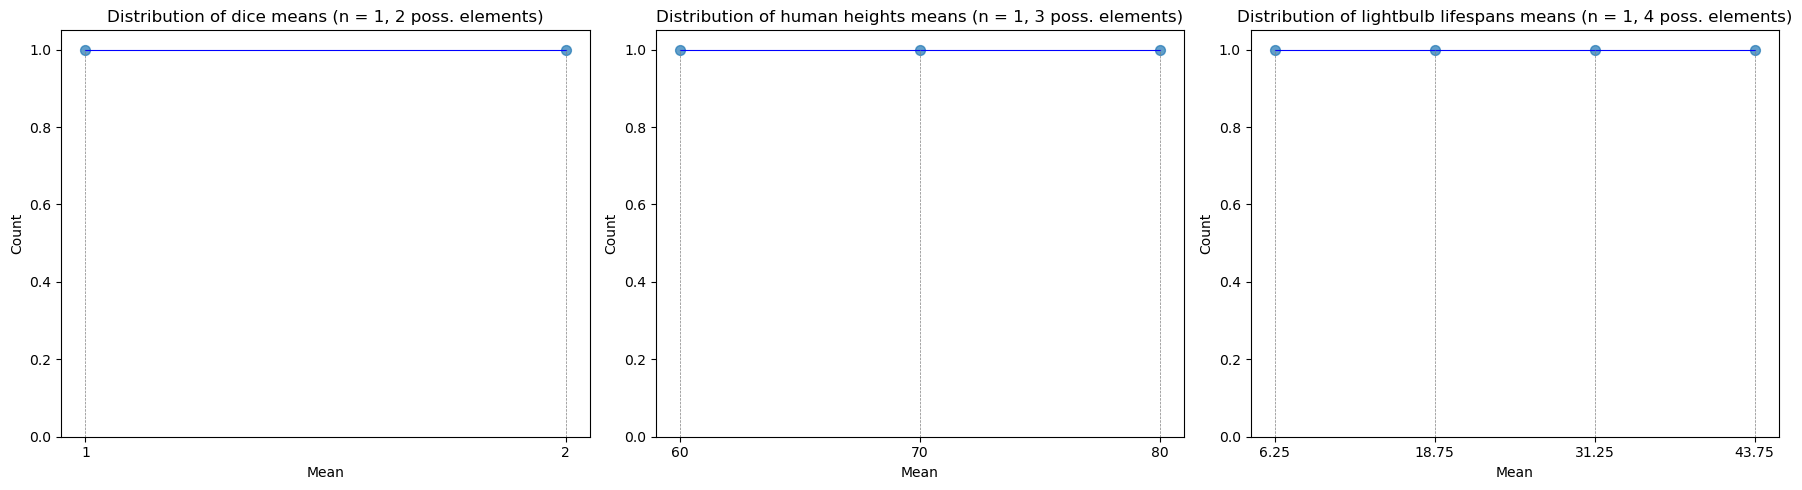

Dice

Number of scores = 2
Count of dice scores: 2
Possible dice values: [1 2]

Count of unique mean values: 3
Possible mean values: [1.  1.5 2. ]



,Score 1,Score 2,Mean
Combination(s) 1,1,1,1.0
2,1,2,1.5
3,2,1,1.5
4,2,2,2.0


Human heights

Number of scores = 2
Count of human heights scores: 3
Possible human heights values: [60. 70. 80.]

Count of unique mean values: 5
Possible mean values: [60. 65. 70. 75. 80.]



,Score 1,Score 2,Mean
Combination(s) 1,60.0,60.0,60.0
2,60.0,70.0,65.0
3,60.0,80.0,70.0
4,70.0,60.0,65.0
5,70.0,70.0,70.0
6,70.0,80.0,75.0
7,80.0,60.0,70.0
8,80.0,70.0,75.0
9,80.0,80.0,80.0


Lightbulb lifespans

Number of scores = 2
Count of lightbulb lifespans scores: 4
Possible lightbulb lifespans values: [ 6.25 18.75 31.25 43.75]

Count of unique mean values: 7
Possible mean values: [ 6.25 12.5  18.75 25.   31.25 37.5  43.75]



,Score 1,Score 2,Mean
Combination(s) 1,6.25,6.25,6.25
2,6.25,18.75,12.50
3,6.25,31.25,18.75
4,6.25,43.75,25.00
5,18.75,6.25,12.50
6,18.75,18.75,18.75
7,18.75,31.25,25.00
8,18.75,43.75,31.25
9,31.25,6.25,18.75
10,31.25,18.75,25.00


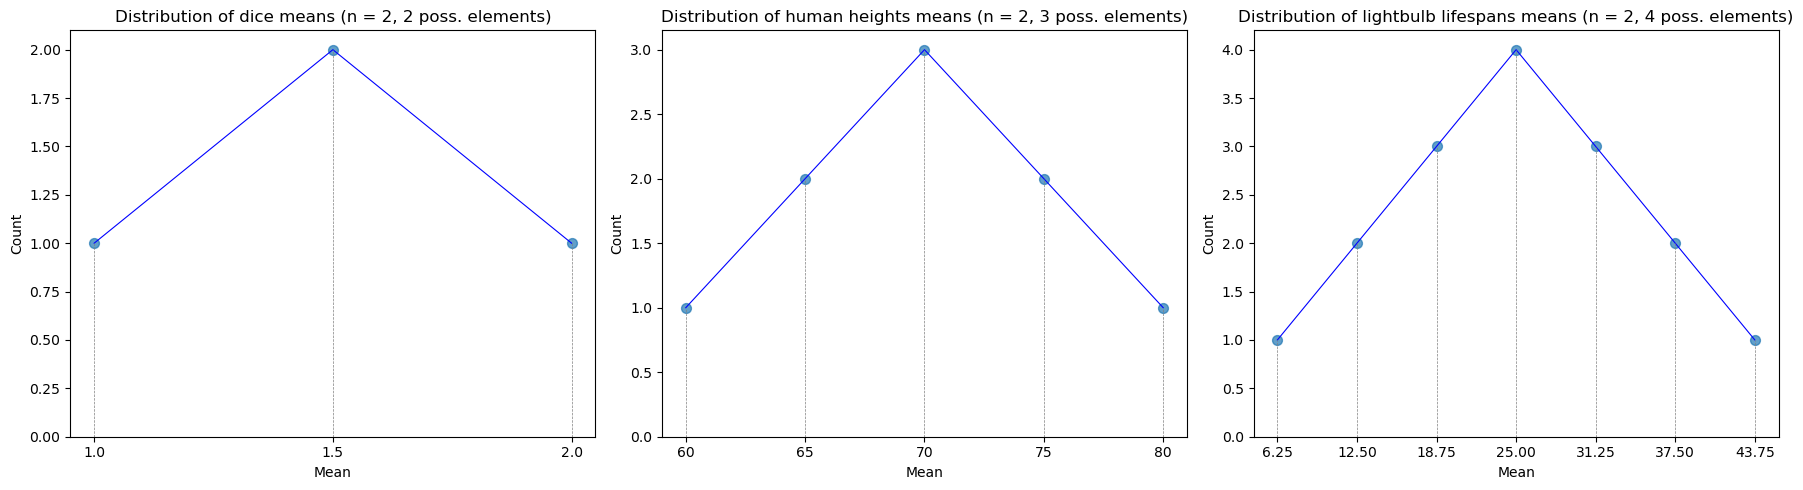

Dice

Number of scores = 3
Count of dice scores: 2
Possible dice values: [1 2]

Count of unique mean values: 4
Possible mean values: [1.   1.33 1.67 2.  ]



,Score 1,Score 2,Score 3,Mean
Combination(s) 1,1,1,1,1.00
2,1,1,2,1.33
3,1,2,1,1.33
4,1,2,2,1.67
5,2,1,1,1.33
6,2,1,2,1.67
7,2,2,1,1.67
8,2,2,2,2.00


Human heights

Number of scores = 3
Count of human heights scores: 3
Possible human heights values: [60. 70. 80.]

Count of unique mean values: 7
Possible mean values: [60.   63.33 66.67 70.   73.33 76.67 80.  ]



,Score 1,Score 2,Score 3,Mean
Combination(s) 1,60.0,60.0,60.0,60.00
2,60.0,60.0,70.0,63.33
3,60.0,60.0,80.0,66.67
4,60.0,70.0,60.0,63.33
5,60.0,70.0,70.0,66.67
6,60.0,70.0,80.0,70.00
7,60.0,80.0,60.0,66.67
8,60.0,80.0,70.0,70.00
9,60.0,80.0,80.0,73.33
10,70.0,60.0,60.0,63.33


Lightbulb lifespans

Number of scores = 3
Count of lightbulb lifespans scores: 4
Possible lightbulb lifespans values: [ 6.25 18.75 31.25 43.75]

Count of unique mean values: 10
Possible mean values: [ 6.25 10.42 14.58 18.75 22.92 27.08 31.25 35.42 39.58 43.75]



,Score 1,Score 2,Score 3,Mean
Combination(s) 1,6.25,6.25,6.25,6.25
2,6.25,6.25,18.75,10.42
3,6.25,6.25,31.25,14.58
4,6.25,6.25,43.75,18.75
5,6.25,18.75,6.25,10.42
...,...,...,...,...
60,43.75,31.25,43.75,39.58
61,43.75,43.75,6.25,31.25
62,43.75,43.75,18.75,35.42
63,43.75,43.75,31.25,39.58


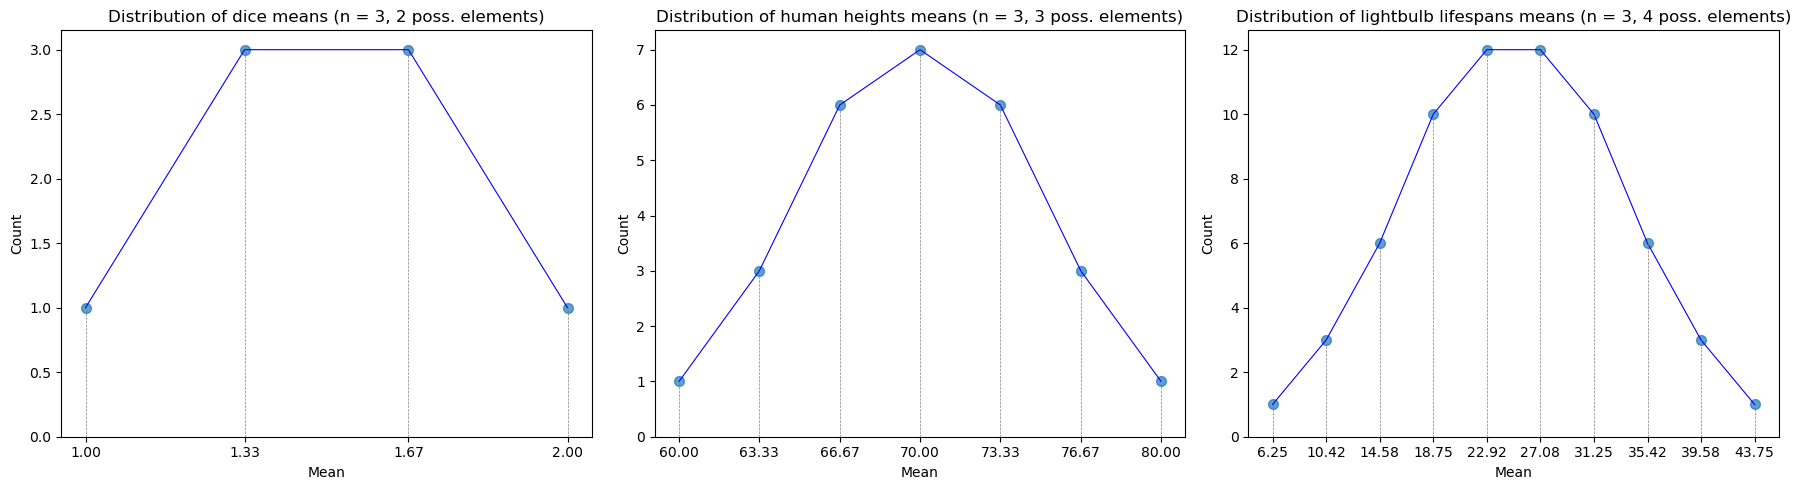

Dice

Number of scores = 4
Count of dice scores: 2
Possible dice values: [1 2]

Count of unique mean values: 5
Possible mean values: [1.   1.25 1.5  1.75 2.  ]



,Score 1,Score 2,Score 3,Score 4,Mean
Combination(s) 1,1,1,1,1,1.00
2,1,1,1,2,1.25
3,1,1,2,1,1.25
4,1,1,2,2,1.50
5,1,2,1,1,1.25
6,1,2,1,2,1.50
7,1,2,2,1,1.50
8,1,2,2,2,1.75
9,2,1,1,1,1.25
10,2,1,1,2,1.50


Human heights

Number of scores = 4
Count of human heights scores: 3
Possible human heights values: [60. 70. 80.]

Count of unique mean values: 9
Possible mean values: [60.  62.5 65.  67.5 70.  72.5 75.  77.5 80. ]



,Score 1,Score 2,Score 3,Score 4,Mean
Combination(s) 1,60.0,60.0,60.0,60.0,60.0
2,60.0,60.0,60.0,70.0,62.5
3,60.0,60.0,60.0,80.0,65.0
4,60.0,60.0,70.0,60.0,62.5
5,60.0,60.0,70.0,70.0,65.0
...,...,...,...,...,...
77,80.0,80.0,70.0,70.0,75.0
78,80.0,80.0,70.0,80.0,77.5
79,80.0,80.0,80.0,60.0,75.0
80,80.0,80.0,80.0,70.0,77.5


Lightbulb lifespans

Number of scores = 4
Count of lightbulb lifespans scores: 4
Possible lightbulb lifespans values: [ 6.25 18.75 31.25 43.75]

Count of unique mean values: 13
Possible mean values: [ 6.25  9.38 12.5  15.62 18.75 21.88 25.   28.12 31.25 34.38 37.5  40.62
 43.75]



,Score 1,Score 2,Score 3,Score 4,Mean
Combination(s) 1,6.25,6.25,6.25,6.25,6.25
2,6.25,6.25,6.25,18.75,9.38
3,6.25,6.25,6.25,31.25,12.50
4,6.25,6.25,6.25,43.75,15.62
5,6.25,6.25,18.75,6.25,9.38
...,...,...,...,...,...
252,43.75,43.75,31.25,43.75,40.62
253,43.75,43.75,43.75,6.25,34.38
254,43.75,43.75,43.75,18.75,37.50
255,43.75,43.75,43.75,31.25,40.62


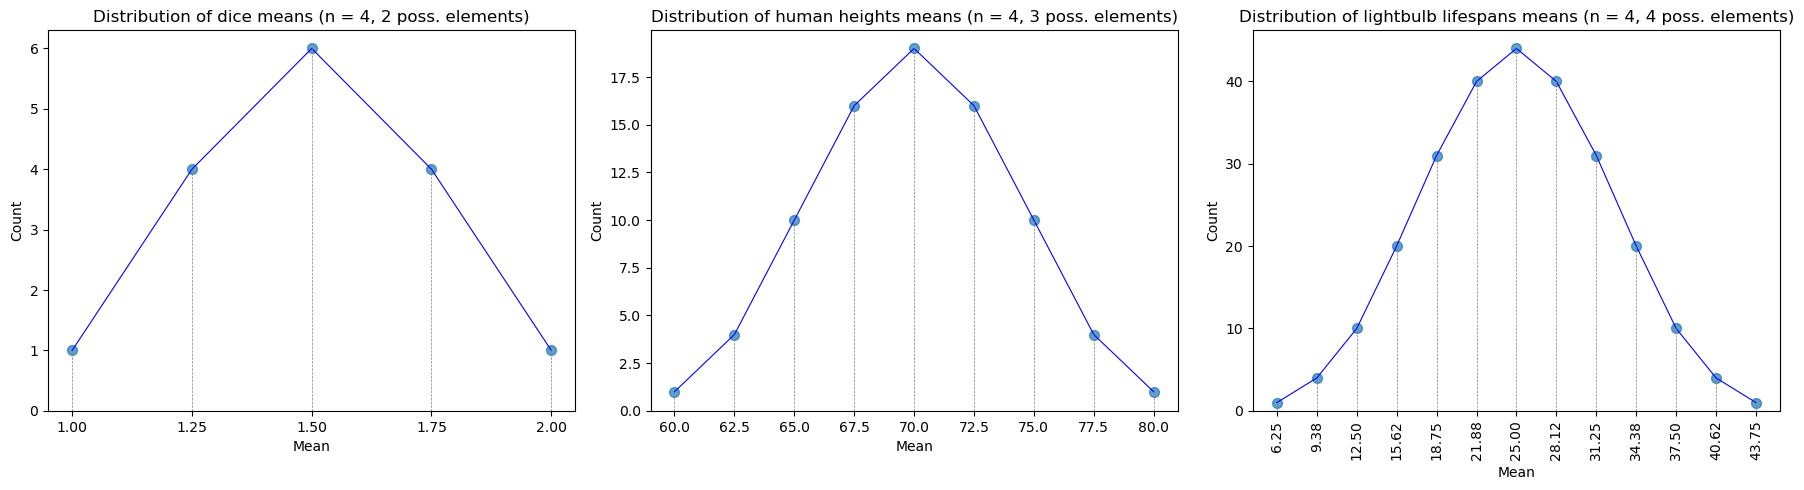

Dice

Number of scores = 5
Count of dice scores: 2
Possible dice values: [1 2]

Count of unique mean values: 6
Possible mean values: [1.  1.2 1.4 1.6 1.8 2. ]



,Score 1,Score 2,Score 3,Score 4,Score 5,Mean
Combination(s) 1,1,1,1,1,1,1.0
2,1,1,1,1,2,1.2
3,1,1,1,2,1,1.2
4,1,1,1,2,2,1.4
5,1,1,2,1,1,1.2
6,1,1,2,1,2,1.4
7,1,1,2,2,1,1.4
8,1,1,2,2,2,1.6
9,1,2,1,1,1,1.2
10,1,2,1,1,2,1.4


Human heights

Number of scores = 5
Count of human heights scores: 3
Possible human heights values: [60. 70. 80.]

Count of unique mean values: 11
Possible mean values: [60. 62. 64. 66. 68. 70. 72. 74. 76. 78. 80.]



,Score 1,Score 2,Score 3,Score 4,Score 5,Mean
Combination(s) 1,60.0,60.0,60.0,60.0,60.0,60.0
2,60.0,60.0,60.0,60.0,70.0,62.0
3,60.0,60.0,60.0,60.0,80.0,64.0
4,60.0,60.0,60.0,70.0,60.0,62.0
5,60.0,60.0,60.0,70.0,70.0,64.0
...,...,...,...,...,...,...
239,80.0,80.0,80.0,70.0,70.0,76.0
240,80.0,80.0,80.0,70.0,80.0,78.0
241,80.0,80.0,80.0,80.0,60.0,76.0
242,80.0,80.0,80.0,80.0,70.0,78.0


Lightbulb lifespans

Number of scores = 5
Count of lightbulb lifespans scores: 4
Possible lightbulb lifespans values: [ 6.25 18.75 31.25 43.75]

Count of unique mean values: 16
Possible mean values: [ 6.25  8.75 11.25 13.75 16.25 18.75 21.25 23.75 26.25 28.75 31.25 33.75
 36.25 38.75 41.25 43.75]



,Score 1,Score 2,Score 3,Score 4,Score 5,Mean
Combination(s) 1,6.25,6.25,6.25,6.25,6.25,6.25
2,6.25,6.25,6.25,6.25,18.75,8.75
3,6.25,6.25,6.25,6.25,31.25,11.25
4,6.25,6.25,6.25,6.25,43.75,13.75
5,6.25,6.25,6.25,18.75,6.25,8.75
...,...,...,...,...,...,...
1020,43.75,43.75,43.75,31.25,43.75,41.25
1021,43.75,43.75,43.75,43.75,6.25,36.25
1022,43.75,43.75,43.75,43.75,18.75,38.75
1023,43.75,43.75,43.75,43.75,31.25,41.25


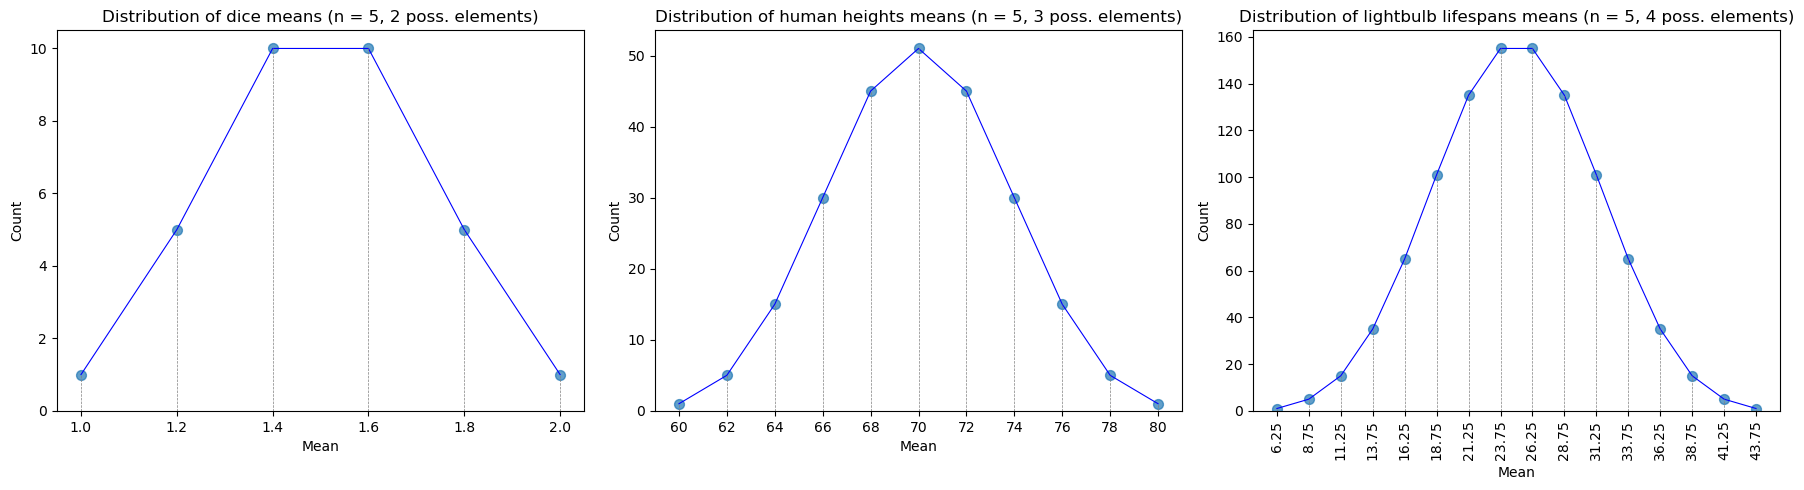

In [5]:
def all_combinations_with_mean(df, n_scores_sdsm):
    """Calculate all possible combinations (with repetition) of scores and their mean."""
    all_combs = list(product(df['X'].unique(), repeat=n_scores_sdsm))
    
    columns = [f"Score {i+1}" for i in range(n_scores_sdsm)] + ['Mean']
    df_combinations = pd.DataFrame(all_combs, columns=columns[:-1])
    df_combinations['Mean'] = df_combinations.mean(axis=1).round(2)
    first_index = "Combination(s) 1"
    other_indices = [f"{i+1}" for i in range(1, len(all_combs))]
    df_combinations.index = [first_index] + other_indices
    return df_combinations

def analyze_data_for_nscore(n_scores_sdsm):
    dfs = {
        'dice': all_combinations_with_mean(df_dice, n_scores_sdsm),
        'human heights': all_combinations_with_mean(df_height, n_scores_sdsm),
        'lightbulb lifespans': all_combinations_with_mean(df_lightbulb, n_scores_sdsm)
    }
    
    num_bins = [num_bins_dice, num_bins_height, num_bins_lightbulb]
    
    plot_dataframes = []
    
    for title, df in dfs.items():
        unique_scores = df.iloc[:, :-1].values.flatten()
        unique_scores = pd.Series(unique_scores).unique()
        
        print(f"{title.capitalize()}\n")
        print(f"Number of scores = {n_scores_sdsm}")
        print(f"Count of {title} scores: {len(unique_scores)}")
        print(f"Possible {title} values: {unique_scores}\n")
       
        mean_counts = df.groupby('Mean').size().reset_index(name='Counts')
        plot_dataframes.append(mean_counts)
        
        print(f"Count of unique mean values: {len(mean_counts)}")
        print(f"Possible mean values: {mean_counts['Mean'].values}\n")
        display(df)

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    for idx, (ax, (title, mean_counts)) in enumerate(zip(axes, zip(dfs.keys(), plot_dataframes))):
        ax.scatter(mean_counts['Mean'], mean_counts['Counts'], alpha=0.7, s=50)
        ax.plot(mean_counts['Mean'], mean_counts['Counts'], color='blue', linewidth=0.8)
        for _, row in mean_counts.iterrows():
            ax.plot([row['Mean'], row['Mean']], [0, row['Counts']], linestyle='--', color='grey', linewidth=0.5)
        ax.set_title(f'Distribution of {title} means (n = {n_scores_sdsm}, {num_bins[idx]} poss. elements)')
        ax.set_xlabel('Mean')
        ax.set_ylabel('Count')
        
        if len(mean_counts['Mean']) > 30:
            # If the number of means is bigger than 30, plot 10 uniformly spaced x-tick labels
            ax.set_xticks(np.linspace(mean_counts['Mean'].min(), mean_counts['Mean'].max(), 10))
        else:
            ax.set_xticks(mean_counts['Mean'].values)
        ax.set_ylim(0,)
        if len(mean_counts['Mean']) > 12:
            ax.tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()
    return plot_dataframes


### MAIN ###

n_scores_sdsm_values = [1, 2, 3, 4, 5]
all_plot_dataframes = []

for n_scores_sdsm in n_scores_sdsm_values:
    plot_dataframes = analyze_data_for_nscore(n_scores_sdsm)
    
    # If all_plot_dataframes is empty, initialize it with empty lists for each condition
    if not all_plot_dataframes:
        for _ in plot_dataframes:
            all_plot_dataframes.append([])
    
    # Now, add the dataframes for each condition into their respective lists
    for idx, df in enumerate(plot_dataframes):
        all_plot_dataframes[idx].append(df)


# Central Limit Theorem (CLT)

> For a sufficiently large sample size from a population with any shape distribution having a known mean (\\( \mu \\)) and a known variance (\\( \sigma^2 \\)), the distribution of the sample means will approximate a normal distribution with mean \\( \mu \\) and variance \\( \sigma^2/n \\).

The SDMS of any distribution will:
1. [shape]: approach a Gaussian as n tends to infinity (in practice, n > 30) or if the population distribution is normal
2. [central tendency]: have the same mean as the population mean
3. [variability]: have a standard deviation (standard error): $ SE = \frac{\sigma}{\sqrt{n}} $
## The Dice Experiment

### Setup:
1. A fair six-sided die: Each face has a probability \\( p = \frac{1}{6} \\).
2. The population mean (\\( \mu \\)) is 3.5, and variance (\\( \sigma^2 \\)) is 2.92.

### Experiment:

1. **One Roll**: The distribution is uniform, with each of the 6 outcomes equally likely.
2. **Average of Two Rolls** (n=2): The possible outcomes range from 1 to 6, but with a non-uniform distribution. Central values become more likely than extreme values.
3. **Average of n Rolls**: As n increases, the distribution of the average of those rolls approaches a normal distribution centered at \\( \mu = 3.5 \\) with a variance decreasing as \\( \sigma^2/n \\).

## Implications of the CLT:

1. **Normal Approximation**: As the sample size \\( n \\) grows, the distribution of sample means becomes closer to a normal distribution.
2. **Standard Error**: The standard deviation of the sample means is the standard error, \\( SE = \sqrt{\sigma^2/n} \\). As \\( n \\) increases, SE decreases, meaning the distribution of sample means becomes narrower.
3. **Predictive Power**: Even if a population distribution is not normal, the CLT allows statisticians to make normal approximations for large enough sample sizes, facilitating hypothesis testing and confidence intervals.

## Summary
The bigger the number of observations, the more gaussian the distribution of sample means will be


### Stack plots

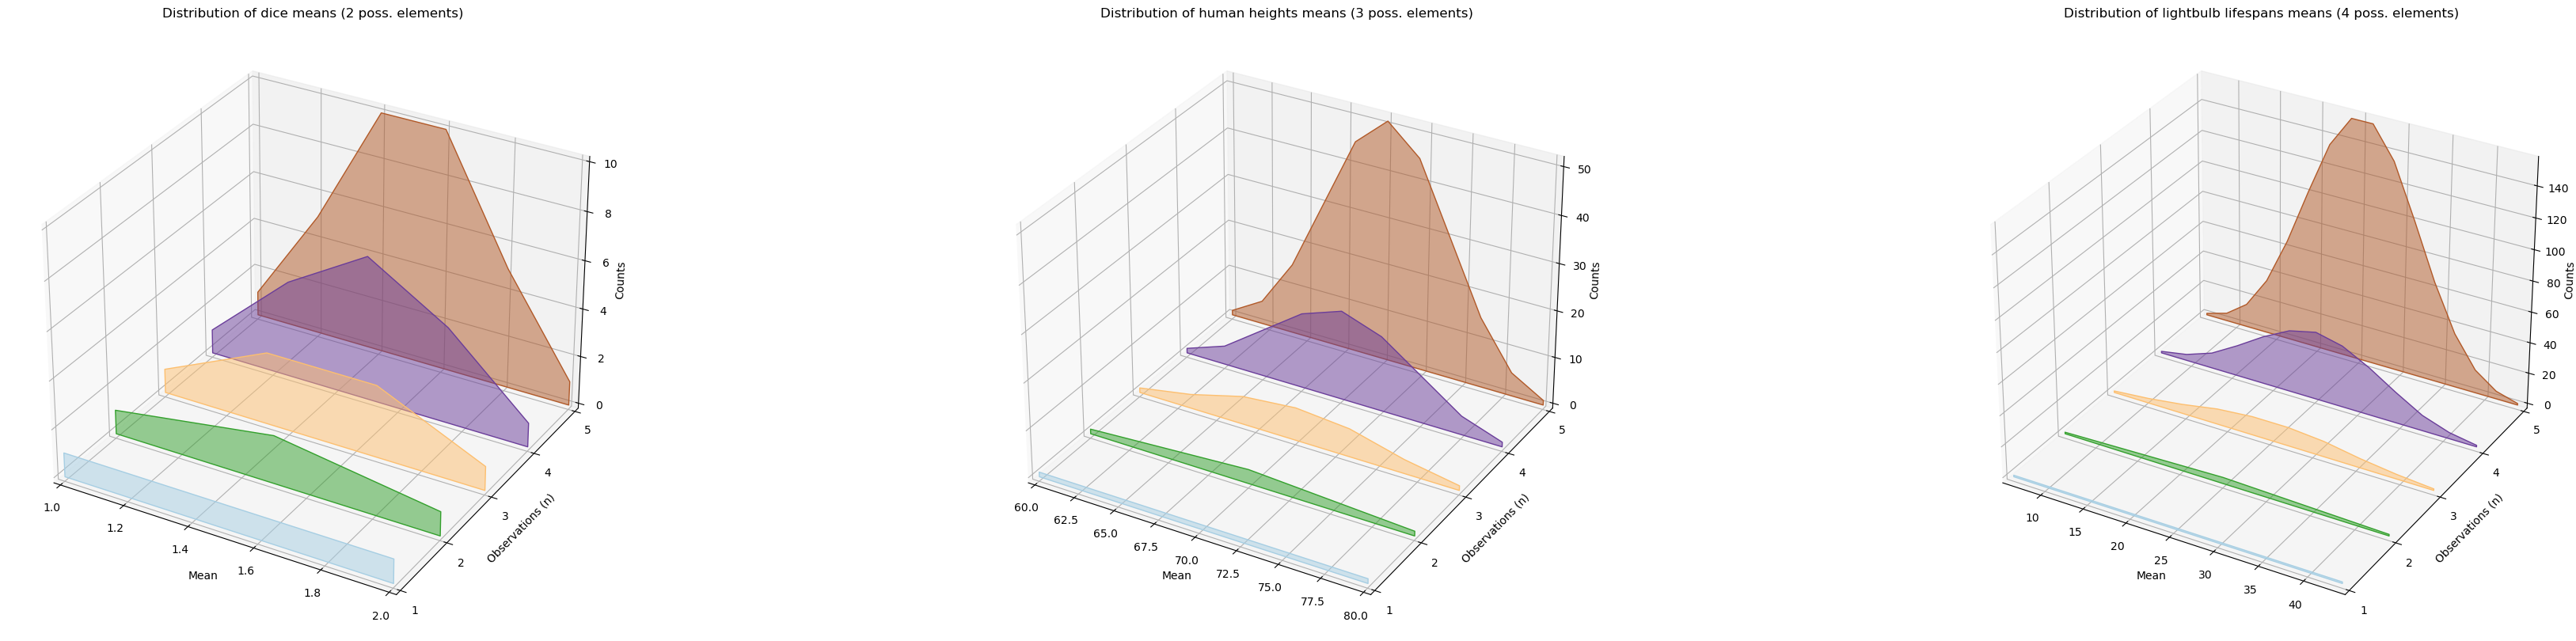

In [6]:
def stackplot(ax, dfs, n_scores_sdsm_values, title):
    # Get the Paired color map
    cmap = plt.cm.Paired
    colors = cmap(np.linspace(0, 1, len(dfs)))

    # Extract all y-values (Counts) to set the zlim later
    all_y_vals = [df["Counts"].values for df in dfs]

    for idx, (df, color) in enumerate(zip(dfs, colors)):
        x_vals = df["Mean"].values
        y_vals = df["Counts"].values

        # Create a list of vertices for the polygon along the z-axis
        verts = [(x, idx, 0) for x in x_vals] + [(x, idx, y) for x, y in zip(x_vals, y_vals)][::-1]

        # Add the filled region with the unique color and transparency
        poly = Poly3DCollection([verts], color=color, alpha=0.5)
        ax.add_collection3d(poly)

    # Setting the limits for each axis
    ax.set_xlim([min(df["Mean"].min() for df in dfs), max(df["Mean"].max() for df in dfs)])
    ax.set_ylim([0, len(dfs)-1])
    ax.set_zlim([0, max(max(y) for y in all_y_vals)])

    ax.set_xlabel('Mean')
    ax.set_ylabel('Observations (n)')
    ax.set_zlabel('Counts', labelpad=0)
    ax.zaxis.label.set_rotation(90)
    ax.zaxis.label.set_horizontalalignment('left')

    ax.set_yticks(range(len(dfs)))
    ax.set_yticklabels(n_scores_sdsm_values)  # Using n_scores_sdsm_values as the y-tick label
    ax.set_title(title)

# Assuming you have data in all_plot_dataframes and n_scores_sdsm_values:
fig, axes = plt.subplots(1, 3, figsize=(15*3, 10), subplot_kw={'projection':'3d'})

# Replace these dummy variables with your actual data:
dfs1, dfs2, dfs3 = all_plot_dataframes[0], all_plot_dataframes[1], all_plot_dataframes[2]

stackplot(axes[0], dfs1, n_scores_sdsm_values, f"Distribution of dice means ({num_bins_dice} poss. elements)")
stackplot(axes[1], dfs2, n_scores_sdsm_values, f"Distribution of human heights means ({num_bins_height} poss. elements)")
stackplot(axes[2], dfs3, n_scores_sdsm_values, f"Distribution of lightbulb lifespans means ({num_bins_lightbulb} poss. elements)")

plt.show()

#### Sampling distribution of sample means for different sample sizes

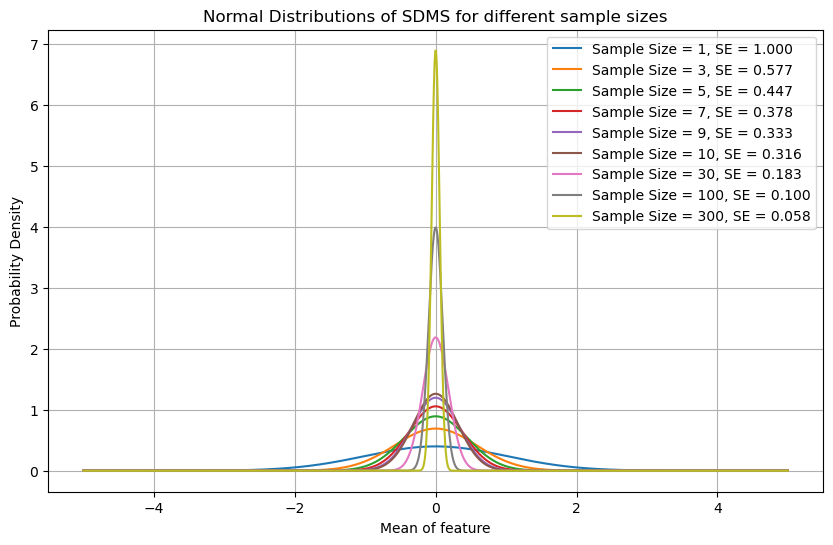

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for the population distribution
population_mean = 0
population_stddev = 1

# Different sample sizes to consider
sample_sizes = [*range(1, 10, 2), 10, 30, 100, 300]

# Generate x values for the plot
x = np.linspace(-5, 5, 1000)

# Create a figure
plt.figure(figsize=(10, 6))

# Plot normal distributions for different sample sizes
for sample_size in sample_sizes:
    standard_error = 1 / np.sqrt(sample_size)
    y = norm.pdf(x, loc=population_mean, scale=standard_error)
    label = f'Sample Size = {sample_size}, SE = {standard_error:.3f}'
    plt.plot(x, y, label=label)

plt.xlabel('Mean of feature')
plt.ylabel('Probability Density')
plt.title('Normal Distributions of SDMS for different sample sizes')
plt.legend()
plt.grid(True)
plt.show()
